In [1]:
import os
%pwd

'e:\\reviewprediction\\research'

In [2]:
os.chdir("../")
%pwd

'e:\\reviewprediction'

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime

In [4]:
orders_dataset= pd.read_csv("artifacts/data_ingestion/olist_orders_dataset.csv")
order_items_dataset= pd.read_csv("artifacts/data_ingestion/olist_order_items_dataset.csv")
order_reviews_dataset= pd.read_csv("artifacts/data_ingestion/olist_order_reviews_dataset.csv")
products_dataset= pd.read_csv("artifacts/data_ingestion/olist_products_dataset.csv")
order_payments_dataset= pd.read_csv("artifacts/data_ingestion/olist_order_payments_dataset.csv")
customers_dataset= pd.read_csv("artifacts/data_ingestion/olist_customers_dataset.csv")
geolocation_dataset= pd.read_csv("artifacts/data_ingestion/olist_geolocation_dataset.csv")
sellers_dataset= pd.read_csv("artifacts/data_ingestion/olist_sellers_dataset.csv")


In [5]:
order_items_products = pd.merge(order_items_dataset,products_dataset,on='product_id')
order_items_products_sellers = pd.merge(order_items_products,sellers_dataset,on='seller_id')
two_order_items_products_sellers = pd.merge(order_items_products_sellers,orders_dataset,on='order_id')
two_order_items_products_sellers_customer = pd.merge(two_order_items_products_sellers,customers_dataset,on='customer_id')
two_order_items_products_sellers_customer_reviews = pd.merge(two_order_items_products_sellers_customer,order_reviews_dataset,on='order_id')
final_dataframe = pd.merge(two_order_items_products_sellers_customer_reviews,order_payments_dataset,on='order_id')

In [8]:
#We are given an extra csv file named 'product categry name translation'. This file contains the English translations of the original Portuguese text. We shall replace the original product category names with these translations.

In [10]:
product_category_name_translation= pd.read_csv("artifacts/data_ingestion/product_category_name_translation.csv")
mapping = dict(product_category_name_translation['product_category_name'].tolist(),product_category_name_translation['product_category_name_english'].tolist())
final_dataframe['product_category_name'] = final_dataframe['product_category_name'].map(mapping)

TypeError: dict expected at most 1 argument, got 2

In [12]:

product_category_name_translation = pd.read_csv("artifacts/data_ingestion/product_category_name_translation.csv")

# Create a mapping dictionary
mapping = dict(zip(product_category_name_translation['product_category_name'],
                   product_category_name_translation['product_category_name_english']))

# Apply the mapping to the 'product_category_name' column in final_dataframe
final_dataframe['product_category_name'] = final_dataframe['product_category_name'].map(mapping)


In [13]:
final_dataframe['product_category_name']

0              cool_stuff
1              cool_stuff
2              cool_stuff
3              cool_stuff
4              cool_stuff
               ...       
117324    furniture_decor
117325    furniture_decor
117326        electronics
117327             drinks
117328             drinks
Name: product_category_name, Length: 117329, dtype: object

In [14]:
#Dropping all the duplicates which have the same Order ID, Customer ID, purchase timestamp, review message. This is becasue a customer cannot post the same review multiple times for the same product at the same instant of time.
final_dataframe = final_dataframe.drop_duplicates(subset=['order_id','order_purchase_timestamp','product_id','customer_unique_id','review_comment_message'])
final_dataframe.shape

(101878, 39)

In [15]:
final_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101878 entries, 0 to 117327
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       101878 non-null  object 
 1   order_item_id                  101878 non-null  int64  
 2   product_id                     101878 non-null  object 
 3   seller_id                      101878 non-null  object 
 4   shipping_limit_date            101878 non-null  object 
 5   price                          101878 non-null  float64
 6   freight_value                  101878 non-null  float64
 7   product_category_name          100402 non-null  object 
 8   product_name_lenght            100424 non-null  float64
 9   product_description_lenght     100424 non-null  float64
 10  product_photos_qty             100424 non-null  float64
 11  product_weight_g               101862 non-null  float64
 12  product_length_cm              1018

In [16]:
#All the ID values are unique. We are dropping these columns since they don't contribute much to understanding the data. 
final_dataframe.drop(['order_id','product_id','seller_id','customer_unique_id'], axis=1, inplace=True)
final_dataframe.columns

Index(['order_item_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value'],
      dtype='object')

In [17]:
#For datetime data, we cannot work with null values. Dropping those rows which contain null values is needed.
final_dataframe.dropna(subset=['shipping_limit_date','order_purchase_timestamp','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'], inplace=True)


In [18]:
final_dataframe.info()


<class 'pandas.core.frame.DataFrame'>
Index: 99741 entries, 0 to 117327
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_item_id                  99741 non-null  int64  
 1   shipping_limit_date            99741 non-null  object 
 2   price                          99741 non-null  float64
 3   freight_value                  99741 non-null  float64
 4   product_category_name          98325 non-null  object 
 5   product_name_lenght            98345 non-null  float64
 6   product_description_lenght     98345 non-null  float64
 7   product_photos_qty             98345 non-null  float64
 8   product_weight_g               99725 non-null  float64
 9   product_length_cm              99725 non-null  float64
 10  product_height_cm              99725 non-null  float64
 11  product_width_cm               99725 non-null  float64
 12  seller_zip_code_prefix         99741 non-null  int

In [19]:
#The 'purchase delivery difference' gives us the number of days between the time of purchase and delivery. The 'estimated actual delivery difference' gives us the delay or the cut-down in the number of days actually required for the delivery.
intermediate_time = final_dataframe['order_delivered_customer_date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").date()) - final_dataframe['order_purchase_timestamp'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").date())
final_dataframe['purchase-delivery difference'] = intermediate_time.apply(lambda x:x.days)

intermediate_time = final_dataframe['order_estimated_delivery_date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").date()) - final_dataframe['order_delivered_customer_date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").date())
final_dataframe['estimated-actual delivery difference'] = intermediate_time.apply(lambda x:x.days)

In [22]:
final_dataframe.isnull().sum()

order_item_id                               0
shipping_limit_date                         0
price                                       0
freight_value                               0
product_category_name                    1416
product_name_lenght                      1396
product_description_lenght               1396
product_photos_qty                       1396
product_weight_g                           16
product_length_cm                          16
product_height_cm                          16
product_width_cm                           16
seller_zip_code_prefix                      0
seller_city                                 0
seller_state                                0
customer_id                                 0
order_status                                0
order_purchase_timestamp                    0
order_approved_at                          14
order_delivered_carrier_date                0
order_delivered_customer_date               0
order_estimated_delivery_date     

In [24]:
'''
finding all the null values, we shall impute. For the categorical 
columns, we shall use the mode and for numerical columns we shall use the median for imputation. 
For revivew comments and title, we use the term 'indisponível' which is the Portuguese for unavailable.

'''


"\nfinding all the null values, we shall impute. For the categorical \ncolumns, we shall use the mode and for numerical columns we shall use the median for imputation. \nFor revivew comments and title, we use the term 'indisponível' which is the Portuguese for unavailable.\n\n"

In [25]:
final_dataframe['product_category_name'].fillna(value=final_dataframe['product_category_name'].mode()[0], inplace=True)
final_dataframe['product_name_lenght'].fillna(value=final_dataframe['product_name_lenght'].mode()[0], inplace=True)
final_dataframe['product_description_lenght'].fillna(value=final_dataframe['product_description_lenght'].median(), inplace=True)
final_dataframe['product_photos_qty'].fillna(value=final_dataframe['product_photos_qty'].mode()[0], inplace=True)
final_dataframe['product_weight_g'].fillna(value=final_dataframe['product_weight_g'].mode()[0], inplace=True)
final_dataframe['product_length_cm'].fillna(value=final_dataframe['product_length_cm'].mode()[0], inplace=True)
final_dataframe['product_height_cm'].fillna(value=final_dataframe['product_height_cm'].mode()[0], inplace=True)
final_dataframe['product_width_cm'].fillna(value=final_dataframe['product_width_cm'].mode()[0], inplace=True)
final_dataframe['review_comment_message'].fillna(value='indisponível', inplace=True)

In [26]:
'''we shall convert all the review scores greater than 3 as part of the positive and the ones below 3 as part of the negative class. Reviews which have the value of 3 is considered to be part of the neutral class.'''

'we shall convert all the review scores greater than 3 as part of the positive and the ones below 3 as part of the negative class. Reviews which have the value of 3 is considered to be part of the neutral class.'

In [27]:
final_dataframe['review_score'] = final_dataframe['review_score'].apply(lambda x: 1 if x > 3 else 0)

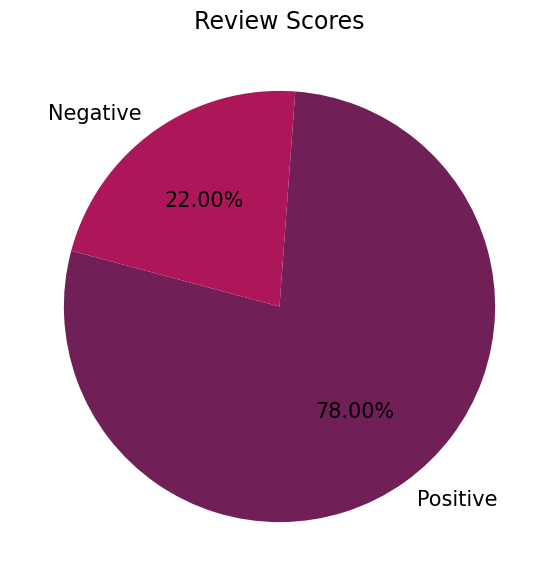

In [28]:
#plotting the pie chart showing the review scores
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
final_dataframe['review_score'].map({0:'Negative',1:'Positive'}).value_counts().plot.pie(autopct='%.2f%%', textprops={'fontsize':15}, startangle=165, colors=['#701f57','#ad1759','#f6b48f'])
plt.title('Review Scores', fontsize=17)
plt.ylabel('')
plt.show()

In [29]:
final_dataframe[['price','freight_value','product_name_lenght','product_description_lenght','product_weight_g','product_length_cm', 'product_height_cm', 'product_width_cm']].describe()


,price,freight_value,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,99741.000000,99741.000000,99741.000000,99741.000000,99741.000000,99741.000000,99741.000000,99741.000000
mean,123.530085,20.061342,49.051092,783.596585,2082.758886,30.061920,16.357436,23.024313
std,186.163938,15.762504,9.976598,645.220610,3736.407037,16.054294,13.264415,11.723665
min,0.850000,0.000000,5.000000,4.000000,0.000000,7.000000,2.000000,6.000000
25%,40.000000,13.140000,43.000000,348.000000,300.000000,18.000000,8.000000,15.000000
50%,78.000000,16.320000,52.000000,602.000000,683.000000,25.000000,13.000000,20.000000
75%,139.000000,21.180000,57.000000,980.000000,1800.000000,38.000000,20.000000,30.000000
max,6735.000000,409.680000,76.000000,3992.000000,40425.000000,105.000000,105.000000,118.000000


In [31]:
'''Let us create a new column called 'price category' This column is used to categorize the goods as expensive, cheap and affordable based on their price. We have used the first, second and third quartiles as the conditions for creating these categories.'''

"Let us create a new column called 'price category' This column is used to categorize the goods as expensive, cheap and affordable based on their price. We have used the first, second and third quartiles as the conditions for creating these categories."

In [32]:
final_dataframe['price_category'] = final_dataframe['price'].apply(lambda x:'expensive' if x>=139 else ('affordable' if x>=40 and x<139 else 'cheap'))

C:\Users\My Pc\AppData\Local\Temp\ipykernel_17328\2285279984.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=final_dataframe['product_category_name'], order=idx, palette="rocket")


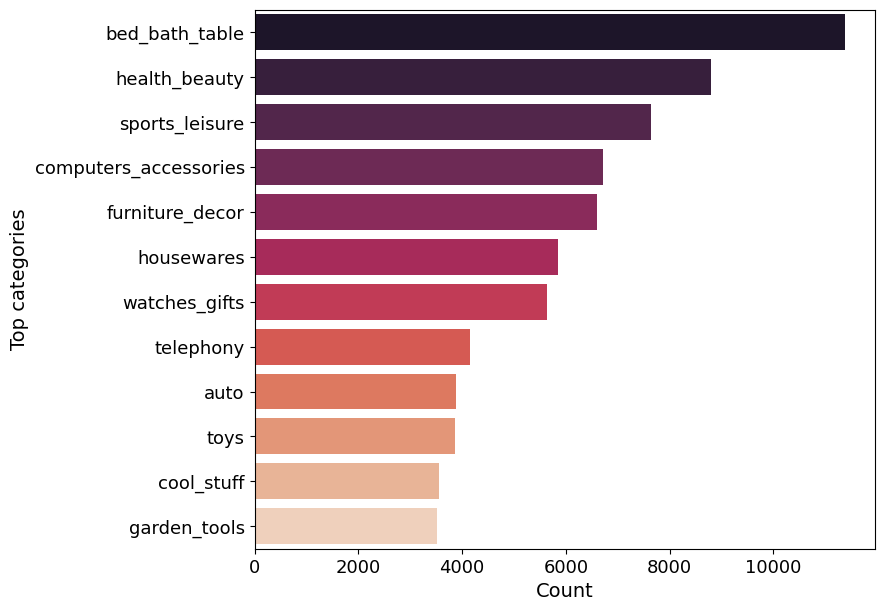

In [35]:
#the top 12 most popular product categories in terms of the frequency of purchase.
import seaborn as sns 
plt.figure(figsize=(8,7))
idx = final_dataframe['product_category_name'].value_counts()[:12].index
sns.countplot(y=final_dataframe['product_category_name'], order=idx, palette="rocket")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Top categories', fontsize=14)
plt.show()

In [36]:
'''THe category 'bed bath table' significantly more popular than most of the other categories. It is the only category whose sales have crossed 10000 units. The category in the 12th position - 'garden tools' only had around 3500 units sold.'''

"THe category 'bed bath table' significantly more popular than most of the other categories. It is the only category whose sales have crossed 10000 units. The category in the 12th position - 'garden tools' only had around 3500 units sold."

C:\Users\My Pc\AppData\Local\Temp\ipykernel_17328\3915656796.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=final_dataframe['customer_state'], order=idx, palette="rocket")


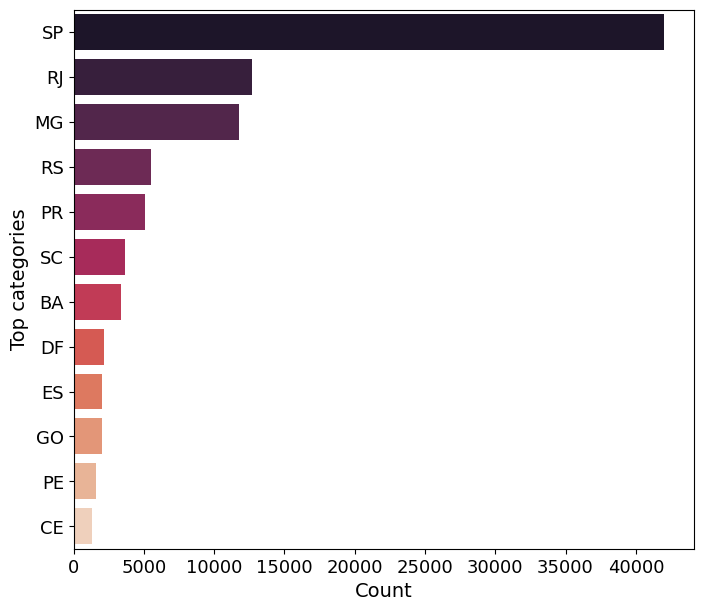

In [37]:
#top states with highest coustomers
plt.figure(figsize=(8,7))
idx = final_dataframe['customer_state'].value_counts()[:12].index
sns.countplot(y=final_dataframe['customer_state'], order=idx, palette="rocket")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Top categories', fontsize=14)
plt.show()

In [38]:
'''Sao Paulo, also shortened to 'SP' is by leaps and bounds the state with the highest customer base for this firm.'''

"Sao Paulo, also shortened to 'SP' is by leaps and bounds the state with the highest customer base for this firm."

Text(0, 0.5, 'Mean Price')

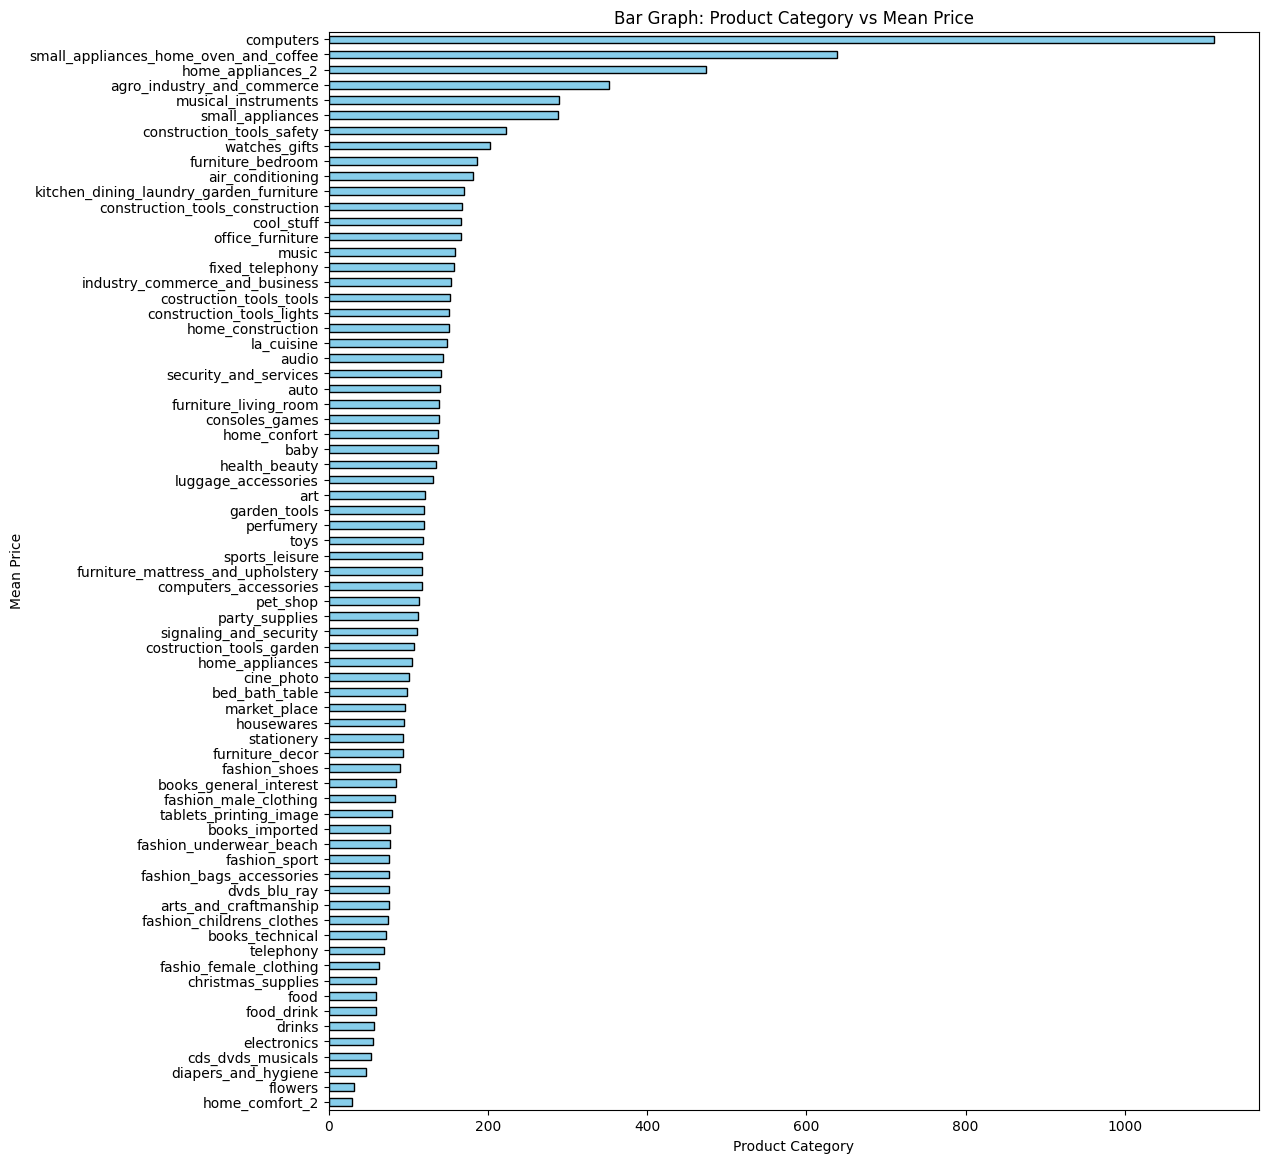

In [40]:
#to check top priced categories of products
# Calculate mean price for each product category
category_mean_price = final_dataframe.groupby('product_category_name')['price'].mean()

# Plot a bar graph
plt.figure(figsize=(12, 14))
category_mean_price.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Bar Graph: Product Category vs Mean Price')
plt.xlabel('Product Category')
plt.ylabel('Mean Price')

In [41]:
'''we can see that the average cost of a product is the highest for the items belonging to the 'computers' category. The average cost is around 1500 real. The second highest category has an average price of nearly half of the highest category.'''

"we can see that the average cost of a product is the highest for the items belonging to the 'computers' category. The average cost is around 1500 real. The second highest category has an average price of nearly half of the highest category."

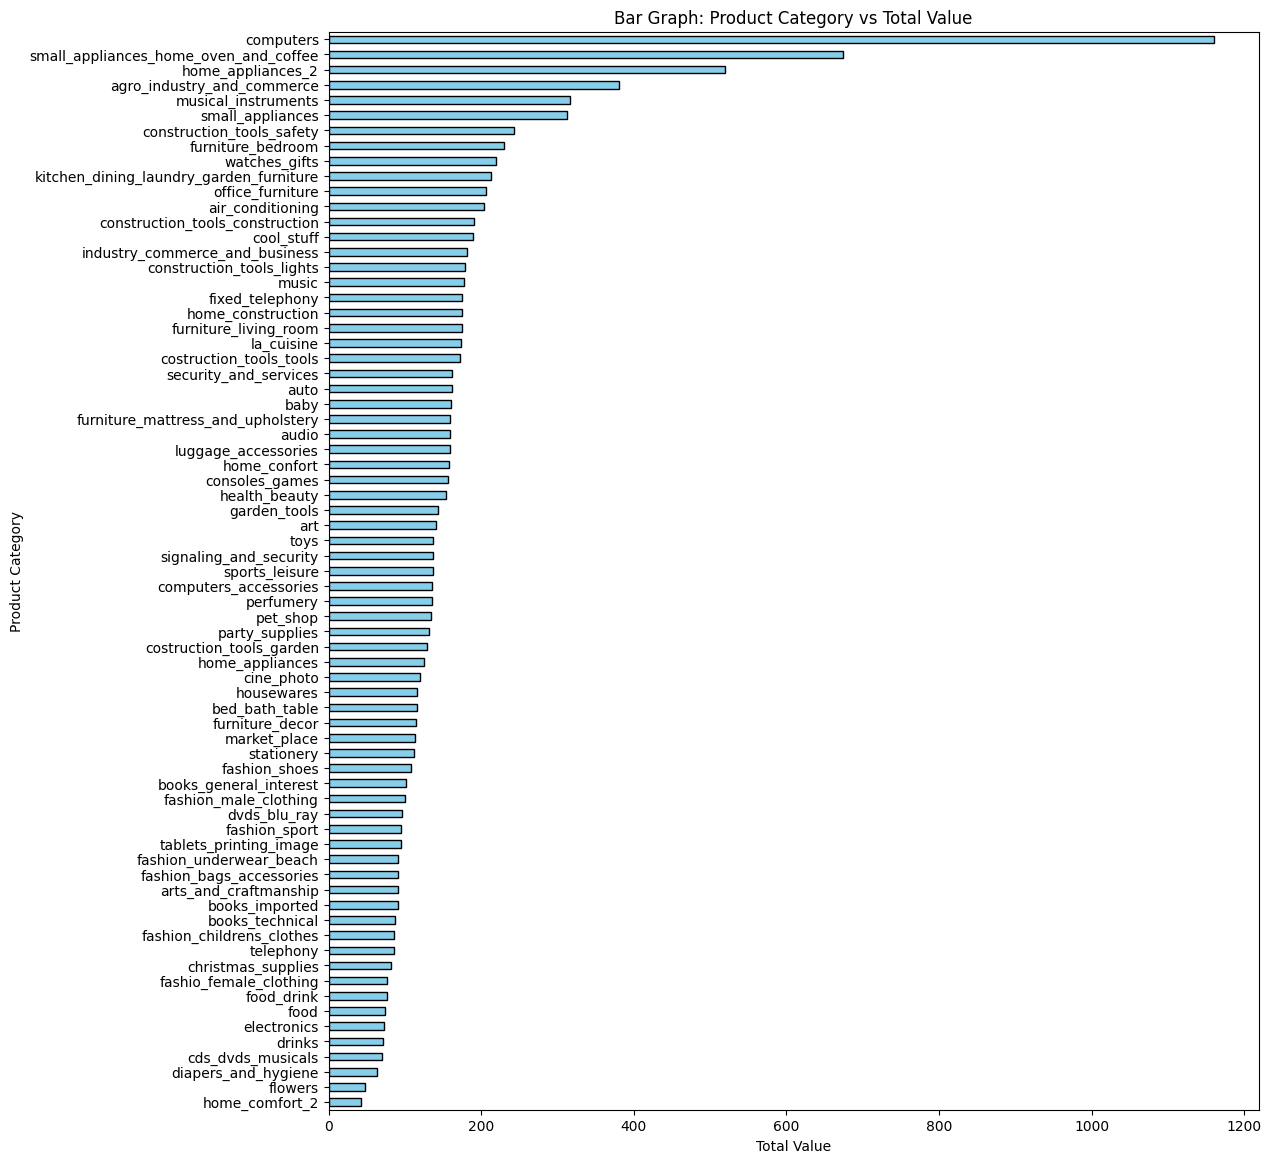

In [42]:
#For this plot, we considered the overall average cost of an item. This means that it is the sum of the fright charges and the original cost of the item.
# Calculate mean price for each product category
category_mean_price = final_dataframe.groupby('product_category_name').apply(lambda x: (x['price'] + x['freight_value']).mean())


# Plot a bar graph
plt.figure(figsize=(12, 14))
category_mean_price.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')

plt.title('Bar Graph: Product Category vs Total Value')
plt.ylabel('Product Category')
plt.xlabel('Total Value')

# Show the plot
plt.show()

In [43]:
'''We can see that the ordering of the plot hasn't changed. It's only that the average cost of each category that has increased'''

"We can see that the ordering of the plot hasn't changed. It's only that the average cost of each category that has increased"

In [45]:
final_dataframe['order_status'].value_counts()

order_status
delivered    99734
canceled         7
Name: count, dtype: int64

In [46]:
final_dataframe = final_dataframe[final_dataframe['order_status'] != 'canceled']

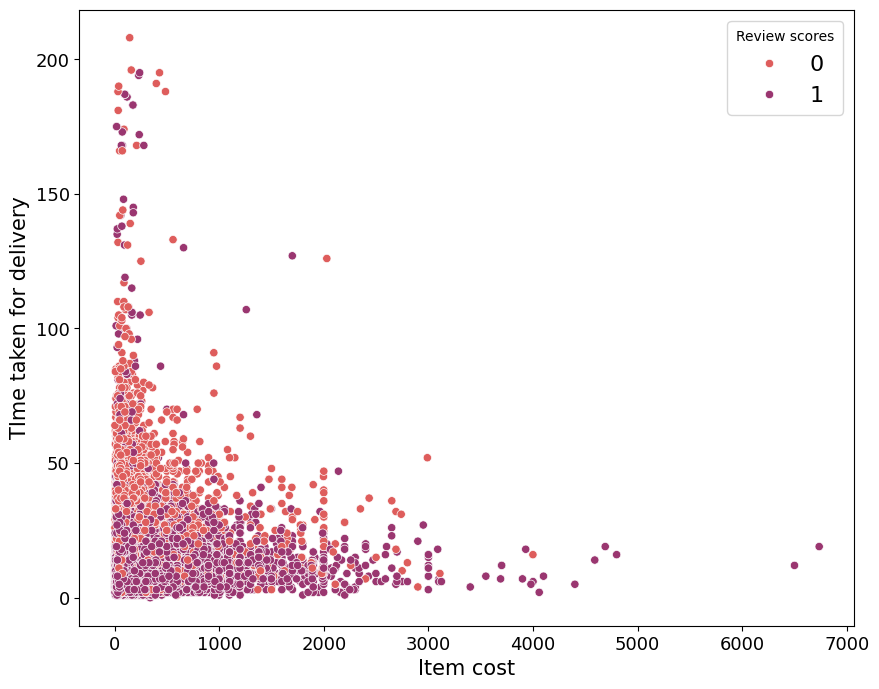

In [47]:
#scatter plot takes the price on the x-axis and total time difference between delivery and purchase on the y-axis.
plt.figure(figsize=(10,8))
sns.scatterplot(x=final_dataframe['price'],y=final_dataframe['purchase-delivery difference'],hue=final_dataframe['review_score'],palette="flare")
plt.xlabel('Item cost', fontsize=15)
plt.ylabel('TIme taken for delivery', fontsize=15)
plt.legend(prop={'size':16}, title='Review scores')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [48]:
'''It can be seen that as the time itaken for delivery increases, the chances to being dissatisfied with the product increases significantly. The increase in price of an item does not cause too much dissatisfaction if it is delivered on time.'''

'It can be seen that as the time itaken for delivery increases, the chances to being dissatisfied with the product increases significantly. The increase in price of an item does not cause too much dissatisfaction if it is delivered on time.'

In [49]:
final_dataframe['purchase_delivery_diff_per_price'] = final_dataframe['purchase-delivery difference']/final_dataframe['price']


C:\Users\My Pc\AppData\Local\Temp\ipykernel_17328\2320267827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataframe['purchase_delivery_diff_per_price'] = final_dataframe['purchase-delivery difference']/final_dataframe['price']


In [50]:
final_dataframe['purchase_delivery_diff_per_price']

0         0.118846
1         0.268336
2         0.261941
3         0.135823
4         0.237691
            ...   
117322    0.120000
117323    0.122528
117325    0.291910
117326    0.028708
117327    0.286738
Name: purchase_delivery_diff_per_price, Length: 99734, dtype: float64

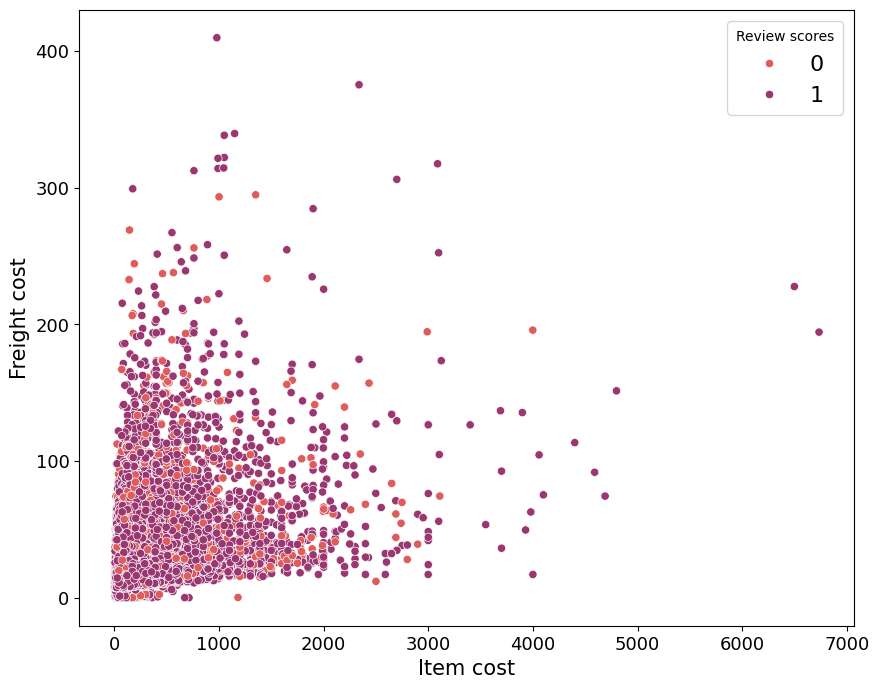

In [51]:
#The scatter plot between the freight cost and item cost
plt.figure(figsize=(10,8))
sns.scatterplot(x=final_dataframe['price'],y=final_dataframe['freight_value'],hue=final_dataframe['review_score'], palette='flare')
plt.xlabel('Item cost', fontsize=15)
plt.ylabel('Freight cost', fontsize=15)
plt.legend(prop={'size':16}, title='Review scores')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [52]:
''' it can be said that even if the freight cost is high, customers were satisfied when the item cost is less.'''

' it can be said that even if the freight cost is high, customers were satisfied when the item cost is less.'

<Figure size 1000x600 with 0 Axes>

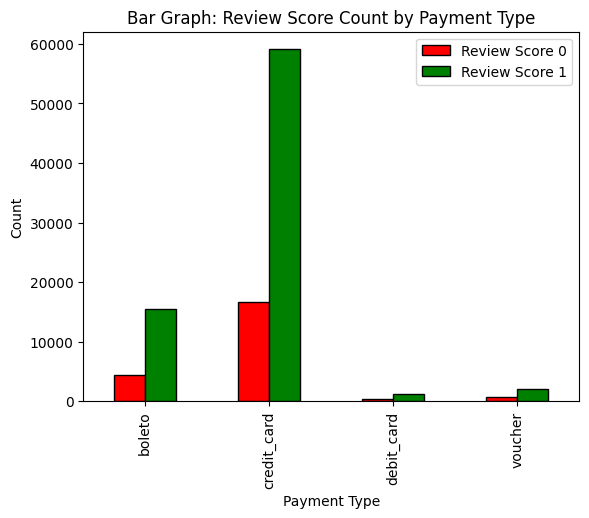

In [53]:
# Plot a bar graph
plt.figure(figsize=(10, 6))
final_dataframe.groupby(['payment_type', 'review_score']).size().unstack().plot(kind='bar', stacked=False, color=['red', 'green'], edgecolor='black')

# Customize the plot
plt.title('Bar Graph: Review Score Count by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.legend(['Review Score 0', 'Review Score 1'])

# Show the plot
plt.show()

In [54]:
'''Credit cards are the most popular mode of payment amongst the customers. They are much more popular than the other alternatives. The second in line, Boletos are a type of vouchers which can only be found only in Brazil. From this plot we could see that the bad reviews given to a product were most probably not because of a payment related issue.'''

'Credit cards are the most popular mode of payment amongst the customers. They are much more popular than the other alternatives. The second in line, Boletos are a type of vouchers which can only be found only in Brazil. From this plot we could see that the bad reviews given to a product were most probably not because of a payment related issue.'

In [55]:
#drop all the columns which aren't necessary for the machine learning task. All the datetime columns should be removed.
final_dataframe.drop(['shipping_limit_date','order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','customer_id'], axis=1, inplace=True)


C:\Users\My Pc\AppData\Local\Temp\ipykernel_17328\2830680015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataframe.drop(['shipping_limit_date','order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','customer_id'], axis=1, inplace=True)


In [56]:
final_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99734 entries, 0 to 117327
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   order_item_id                         99734 non-null  int64  
 1   price                                 99734 non-null  float64
 2   freight_value                         99734 non-null  float64
 3   product_category_name                 99734 non-null  object 
 4   product_name_lenght                   99734 non-null  float64
 5   product_description_lenght            99734 non-null  float64
 6   product_photos_qty                    99734 non-null  float64
 7   product_weight_g                      99734 non-null  float64
 8   product_length_cm                     99734 non-null  float64
 9   product_height_cm                     99734 non-null  float64
 10  product_width_cm                      99734 non-null  float64
 11  seller_zip_code_pre

In [57]:
#The column 'review availability' checks whether the review for a particular product is available or not.
final_dataframe['review_availability'] = final_dataframe['review_comment_message'].apply(lambda x: 1 if x != 'indisponível' else 0)


C:\Users\My Pc\AppData\Local\Temp\ipykernel_17328\3721582943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataframe['review_availability'] = final_dataframe['review_comment_message'].apply(lambda x: 1 if x != 'indisponível' else 0)


In [58]:
final_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99734 entries, 0 to 117327
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   order_item_id                         99734 non-null  int64  
 1   price                                 99734 non-null  float64
 2   freight_value                         99734 non-null  float64
 3   product_category_name                 99734 non-null  object 
 4   product_name_lenght                   99734 non-null  float64
 5   product_description_lenght            99734 non-null  float64
 6   product_photos_qty                    99734 non-null  float64
 7   product_weight_g                      99734 non-null  float64
 8   product_length_cm                     99734 non-null  float64
 9   product_height_cm                     99734 non-null  float64
 10  product_width_cm                      99734 non-null  float64
 11  seller_zip_code_pre

In [176]:
from dataclasses import dataclass
from pathlib import Path


@dataclass(frozen=True)
class DataValidationConfig:
    root_dir: Path
    STATUS_FILE: str
    unzip_data_dir: Path
    all_schema: dict

In [177]:
from reviewprediction.constants import *
from reviewprediction.utils.common import read_yaml, create_directories

In [178]:
class ConfigurationManager:
    def __init__(
        self,
        config_filepath = CONFIG_FILE_PATH,
        params_filepath = PARAMS_FILE_PATH,
        schema_filepath = SCHEMA_FILE_PATH):

        self.config = read_yaml(config_filepath)
        self.params = read_yaml(params_filepath)
        self.schema = read_yaml(schema_filepath)

        create_directories([self.config.artifacts_root])

    
    def get_data_validation_config(self) -> DataValidationConfig:
        config = self.config.data_validation
        schema = self.schema.COLUMNS

        create_directories([config.root_dir])

        data_validation_config = DataValidationConfig(
            root_dir=config.root_dir,
            STATUS_FILE=config.STATUS_FILE,
            unzip_data_dir = config.unzip_data_dir,
            all_schema=schema,
        )

        return data_validation_config

In [179]:
import os
from reviewprediction import logger                           
import pandas as pd
import numpy as np
from datetime import datetime

In [180]:
class DataValidation:
    def __init__(self, config: DataValidationConfig):
        self.config = config
        orders_dataset= pd.read_csv(os.path.join("artifacts/data_ingestion","olist_orders_dataset.csv"))
        order_items_dataset= pd.read_csv(os.path.join("artifacts/data_ingestion","olist_order_items_dataset.csv"))
        order_reviews_dataset= pd.read_csv(os.path.join("artifacts/data_ingestion","olist_order_reviews_dataset.csv"))
        products_dataset= pd.read_csv(os.path.join("artifacts/data_ingestion","olist_products_dataset.csv"))
        order_payments_dataset= pd.read_csv(os.path.join("artifacts/data_ingestion","olist_order_payments_dataset.csv"))
        customers_dataset= pd.read_csv(os.path.join("artifacts/data_ingestion","olist_customers_dataset.csv"))
        geolocation_dataset= pd.read_csv(os.path.join("artifacts/data_ingestion","olist_geolocation_dataset.csv"))
        sellers_dataset= pd.read_csv(os.path.join("artifacts/data_ingestion","olist_sellers_dataset.csv"))
        product_category_name_translation = pd.read_csv(os.path.join("artifacts/data_ingestion","product_category_name_translation.csv"))

        order_items_products = pd.merge(order_items_dataset,products_dataset,on='product_id')
        order_items_products_sellers = pd.merge(order_items_products,sellers_dataset,on='seller_id')
        two_order_items_products_sellers = pd.merge(order_items_products_sellers,orders_dataset,on='order_id')
        two_order_items_products_sellers_customer = pd.merge(two_order_items_products_sellers,customers_dataset,on='customer_id')
        two_order_items_products_sellers_customer_reviews = pd.merge(two_order_items_products_sellers_customer,order_reviews_dataset,on='order_id')
        final_dataframe = pd.merge(two_order_items_products_sellers_customer_reviews,order_payments_dataset,on='order_id')

        # Create a mapping dictionary
        mapping = dict(zip(product_category_name_translation['product_category_name'],
                   product_category_name_translation['product_category_name_english']))

        # Apply the mapping to the 'product_category_name' column in final_dataframe
        final_dataframe['product_category_name'] = final_dataframe['product_category_name'].map(mapping)

        final_dataframe = final_dataframe.drop_duplicates(subset=['order_id','order_purchase_timestamp','product_id','customer_unique_id','review_comment_message'])
        final_dataframe.drop(['order_id','product_id','seller_id','customer_unique_id'], axis=1, inplace=True)
        final_dataframe.dropna(subset=['shipping_limit_date','order_purchase_timestamp','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'], inplace=True)
        intermediate_time = final_dataframe['order_delivered_customer_date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").date()) - final_dataframe['order_purchase_timestamp'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").date())
        final_dataframe['purchase-delivery difference'] = intermediate_time.apply(lambda x:x.days)
        intermediate_time = final_dataframe['order_estimated_delivery_date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").date()) - final_dataframe['order_delivered_customer_date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").date())
        final_dataframe['estimated-actual delivery difference'] = intermediate_time.apply(lambda x:x.days)

        final_dataframe['product_category_name'].fillna(value=final_dataframe['product_category_name'].mode()[0], inplace=True)
        final_dataframe['product_name_lenght'].fillna(value=final_dataframe['product_name_lenght'].mode()[0], inplace=True)
        final_dataframe['product_description_lenght'].fillna(value=final_dataframe['product_description_lenght'].median(), inplace=True)
        final_dataframe['product_photos_qty'].fillna(value=final_dataframe['product_photos_qty'].mode()[0], inplace=True)
        final_dataframe['product_weight_g'].fillna(value=final_dataframe['product_weight_g'].mode()[0], inplace=True)
        final_dataframe['product_length_cm'].fillna(value=final_dataframe['product_length_cm'].mode()[0], inplace=True)
        final_dataframe['product_height_cm'].fillna(value=final_dataframe['product_height_cm'].mode()[0], inplace=True)
        final_dataframe['product_width_cm'].fillna(value=final_dataframe['product_width_cm'].mode()[0], inplace=True)
        final_dataframe['review_comment_message'].fillna(value='indisponível', inplace=True)


        final_dataframe['review_score'] = final_dataframe['review_score'].apply(lambda x: 1 if x > 3 else 0)
        final_dataframe['price_category'] = final_dataframe['price'].apply(lambda x:'expensive' if x>=139 else ('affordable' if x>=40 and x<139 else 'cheap'))
        final_dataframe = final_dataframe[final_dataframe['order_status'] != 'canceled']
        final_dataframe['purchase_delivery_diff_per_price'] = final_dataframe['purchase-delivery difference']/final_dataframe['price']
        final_dataframe.drop(['shipping_limit_date','order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','customer_id'], axis=1, inplace=True)

        final_dataframe['review_availability'] = final_dataframe['review_comment_message'].apply(lambda x: 1 if x != 'indisponível' else 0)

        final_dataframe.to_csv(self.config.unzip_data_dir,index=False,header=True)



    def validate_all_columns(self)-> bool:
        try:
            validation_status = None

            data = pd.read_csv(self.config.unzip_data_dir)
            
            all_cols = list(data.columns)

            all_schema = self.config.all_schema.keys()

            
            for col in all_cols:
                if col not in all_schema:
                    validation_status = False
                    with open(self.config.STATUS_FILE, 'w') as f:
                        f.write(f"Validation status: {validation_status}")
                else:
                    validation_status = True
                    with open(self.config.STATUS_FILE, 'w') as f:
                        f.write(f"Validation status: {validation_status}")

            return validation_status
        
        except Exception as e:
            raise e

In [181]:
try:
    config = ConfigurationManager()
    data_validation_config = config.get_data_validation_config()
    data_validation = DataValidation(config=data_validation_config)
    data_validation.validate_all_columns()
except Exception as e:
    raise e

[2024-01-05 13:00:09,777: INFO: common: yaml file: config\config.yaml loaded successfully]
[2024-01-05 13:00:09,781: INFO: common: yaml file: params.yaml loaded successfully]
[2024-01-05 13:00:09,794: INFO: common: yaml file: schema.yaml loaded successfully]
[2024-01-05 13:00:09,796: INFO: common: created directory at: artifacts]
[2024-01-05 13:00:09,799: INFO: common: created directory at: artifacts/data_validation]


In [174]:
%pwd

'e:\\reviewprediction'